In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as sgt

In [9]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [11]:
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

In [10]:
data_copy['market_value'] = data_copy.ftse

In [12]:
data_copy['returns'] = data_copy.market_value.pct_change(1).mul(100)

Take a closer look at the ACF plot, the lags which do not show significance in the ACF plot will also not show significance with the coefficients when a model with that level of lags is selected. For example, in the ACF plot the lag 7 does not show significance. When you fit the model with lags = 7, the coefficients for 7th lag will also not show any significance


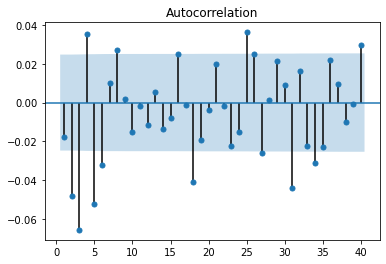

In [26]:
sgt.plot_acf(data_copy.returns[1:],zero = False,lags = 40)
print('Take a closer look at the ACF plot, the lags which do not show significance in the ACF plot will also not show significance with the coefficients when a model with that level of lags is selected. For example, in the ACF plot the lag 7 does not show significance. When you fit the model with lags = 7, the coefficients for 7th lag will also not show any significance')

### Single lag MA Model

In [15]:
moving_average_model = ARMA(data_copy.returns[1:],order = (0,1))
results_ma_model = moving_average_model.fit()

In [16]:
results_ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               -9597.598
Method:                       css-mle   S.D. of innovations              1.117
Date:                Mon, 03 Aug 2020   AIC                          19201.195
Time:                        16:06:34   BIC                          19221.429
Sample:                    01-10-1994   HQIC                         19208.206
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.374      0.169      -0.008       0.046
ma.L1.returns    -0.0196      0.013     -1.467      0.142      -0.046       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           51.1299           +0.0000j           51.1299            0.0000
-----------------------------------------------------------------------------
"""

### Fitting a higher lag MA model

In [19]:
moving_average_model_lag2 = ARMA(data_copy.returns[1:],order = (0,2))
results_ma_model_2 = moving_average_model_lag2.fit()

In [20]:
results_ma_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 2)   Log Likelihood               -9589.839
Method:                       css-mle   S.D. of innovations              1.115
Date:                Mon, 03 Aug 2020   AIC                          19187.677
Time:                        16:09:19   BIC                          19214.655
Sample:                    01-10-1994   HQIC                         19197.025
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.457      0.145      -0.007       0.045
ma.L1.returns    -0.0254      0.013     -2.000      0.045      -0.050      -0.001
ma.L2.returns    -0.0488      0.012     -3.940      0.000      -0.073      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.2761           +0.0000j            4.2761            0.0000
MA.2           -4.7968           +0.0000j            4.7968            0.5000
-----------------------------------------------------------------------------
"""

In [21]:
from scipy.stats.distributions import chi2

def log_likelihood_ratio(model_1,model_2,df = 1):
    log_likelihood_model_1 = model_1.fit().llf
    log_likelihood_model_2 = model_2.fit().llf
    likelihood_ratio = (2*(log_likelihood_model_2-log_likelihood_model_1))
    p_value = chi2.sf(likelihood_ratio,df).round(3)
    return p_value

In [23]:
log_likelihood_ratio(moving_average_model,moving_average_model_lag2)

0.0

In [25]:
moving_average_model_lag2 = ARMA(data_copy.returns[1:],order = (0,9))
results_ma_model_2 = moving_average_model_lag2.fit()
results_ma_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 9)   Log Likelihood               -9557.583
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 03 Aug 2020   AIC                          19137.166
Time:                        16:14:26   BIC                          19211.355
Sample:                    01-10-1994   HQIC                         19162.871
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.614      0.106      -0.004       0.042
ma.L1.returns    -0.0199      0.013     -1.574      0.116      -0.045       0.005
ma.L2.returns    -0.0491      0.013     -3.897      0.000      -0.074      -0.024
ma.L3.returns    -0.0694      0.013     -5.489      0.000      -0.094      -0.045
ma.L4.returns     0.0331      0.013      2.606      0.009       0.008       0.058
ma.L5.returns    -0.0525      0.013     -4.096      0.000      -0.078      -0.027
ma.L6.returns    -0.0310      0.013     -2.397      0.017      -0.056      -0.006
ma.L7.returns     0.0079      0.013      0.615      0.538      -0.017       0.033
ma.L8.returns     0.0255      0.012      2.053      0.040       0.001       0.050
ma.L9.returns    -0.0032      0.013     -0.240      0.811      -0.029       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4781           -0.6890j            1.6308           -0.4306
MA.2           -1.4781           +0.6890j            1.6308            0.4306
MA.3           -0.7793           -1.3103j            1.5245           -0.3354
MA.4           -0.7793           +1.3103j            1.5245            0.3354
MA.5            0.5824           -1.3847j            1.5022           -0.1866
MA.6            0.5824           +1.3847j            1.5022            0.1866
MA.7            1.6105           -0.4190j            1.6641           -0.0405
MA.8            1.6105           +0.4190j            1.6641            0.0405
MA.9            8.1481           -0.0000j            8.1481           -0.0000
-----------------------------------------------------------------------------
"""

In [27]:
moving_average_model_lag8 = ARMA(data_copy.returns[1:],order = (0,8))
results_ma_model_8 = moving_average_model_lag8.fit()
results_ma_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               -9557.611
Method:                       css-mle   S.D. of innovations              1.110
Date:                Mon, 03 Aug 2020   AIC                          19135.223
Time:                        16:16:36   BIC                          19202.668
Sample:                    01-10-1994   HQIC                         19158.591
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.609      0.108      -0.004       0.042
ma.L1.returns    -0.0197      0.013     -1.564      0.118      -0.044       0.005
ma.L2.returns    -0.0491      0.013     -3.896      0.000      -0.074      -0.024
ma.L3.returns    -0.0694      0.013     -5.488      0.000      -0.094      -0.045
ma.L4.returns     0.0329      0.013      2.598      0.009       0.008       0.058
ma.L5.returns    -0.0523      0.013     -4.090      0.000      -0.077      -0.027
ma.L6.returns    -0.0311      0.013     -2.412      0.016      -0.056      -0.006
ma.L7.returns     0.0076      0.013      0.597      0.551      -0.017       0.033
ma.L8.returns     0.0255      0.012      2.052      0.040       0.001       0.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5487           -0.4196j            1.6045           -0.0421
MA.2            1.5487           +0.4196j            1.6045            0.0421
MA.3            0.5993           -1.3679j            1.4934           -0.1843
MA.4            0.5993           +1.3679j            1.4934            0.1843
MA.5           -0.7874           -1.3439j            1.5576           -0.3344
MA.6           -0.7874           +1.3439j            1.5576            0.3344
MA.7           -1.5101           -0.7333j            1.6787           -0.4280
MA.8           -1.5101           +0.7333j            1.6787            0.4280
-----------------------------------------------------------------------------
"""

### Residuals for returns - 
With the lag 8 model we will look into the residuals

In [28]:
data_copy['residual_lag_8'] = results_ma_model_8.resid[1:]

In [31]:
print(round(data_copy.residual_lag_8.mean(),3))
print(round(data_copy.residual_lag_8.var(),3))

-0.0
1.231


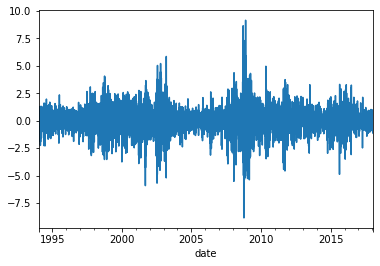

In [32]:
## Plotting the residuals
data_copy.residual_lag_8.plot()

The ACF plot for residuals dictates that the initial 8 lags do not have significance as they are incorporated in the model, the next lags upto 18 are also not significant. This way the model adjusts to the changes in the time series values and makes older value irrelevant in the predictions


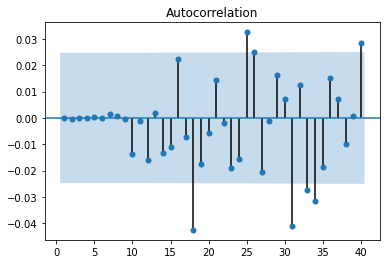

In [35]:
sgt.plot_acf(data_copy.residual_lag_8[2:],zero = False,lags = 40)
print('The ACF plot for residuals dictates that the initial 8 lags do not have significance as they are incorporated in the model, the next lags upto 18 are also not significant. This way the model adjusts to the changes in the time series values and makes older value irrelevant in the predictions')

In [36]:
data = pd.read_csv(r'index2018.csv')
data_copy = data.copy()
data_copy.date = pd.to_datetime(data_copy.date,dayfirst = True)
data_copy.set_index('date',inplace = True)
data_copy = data_copy.asfreq('b')
data_copy = data_copy.fillna(method = 'ffill')

In [37]:
## Modeling for the prices
data_copy['market_value'] = data_copy.nikkei
data_copy.drop(['spx','dax','ftse','nikkei'],axis = 1,inplace = True)
train_size = int(len(data_copy)*0.8)
train_data,test_data = data_copy.iloc[:train_size],data_copy.iloc[train_size:]

The ACF plot suggests a infinite MA model as none of the lags are insignificant.


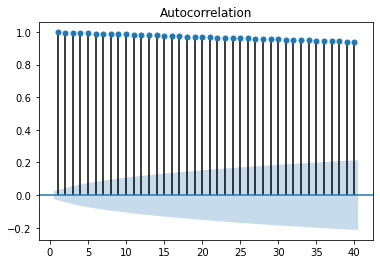

In [40]:
sgt.plot_acf(data_copy.market_value,zero = False, lags = 40)
print('The ACF plot suggests a infinite MA model as none of the lags are insignificant.')